Enter x-coordinate for R-face (0-15):  0
Enter y-coordinate for G-face (0-15):  0
Enter z-coordinate for B-face (0-15):  0
Enter clockwise rotation angle for RG-face (0, 90, 180, 270):  0
Enter clockwise rotation angle for GB-face (0, 90, 180, 270):  0
Enter clockwise rotation angle for BR-face (0, 90, 180, 270):  0
Enter the price you want to pay (minimum 20):  60


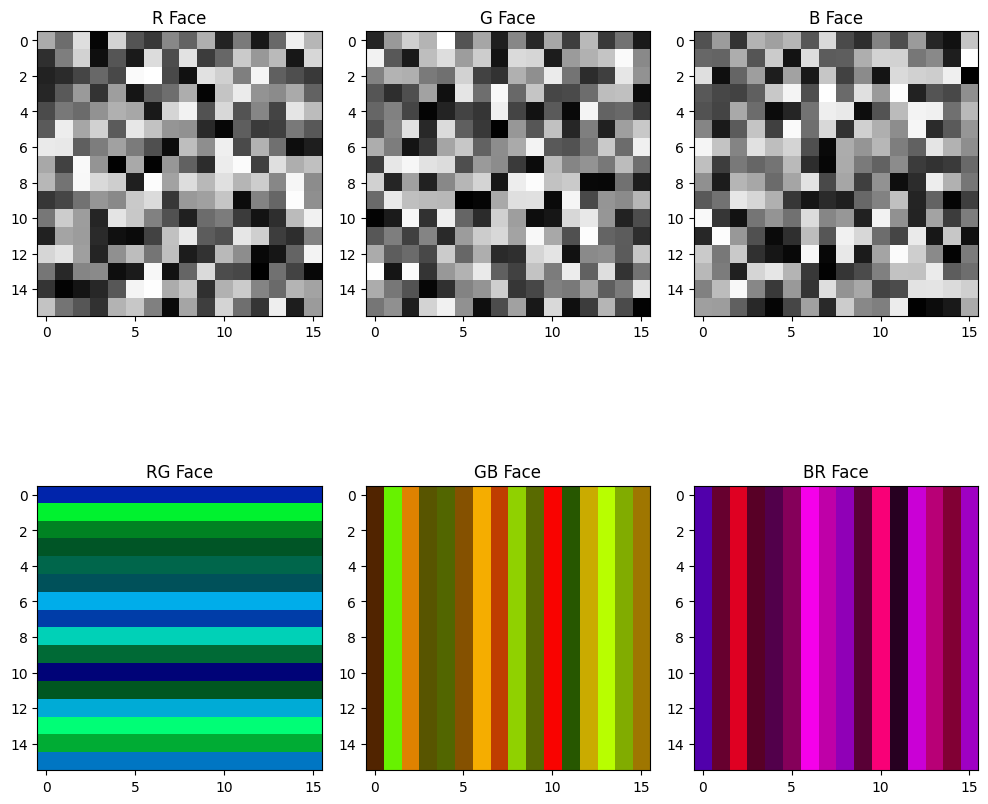

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to generate random permutations of integers in the range [0, 255] for each face
def generate_face():
    return np.random.permutation(256).reshape(16, 16).astype(np.uint8)

# Function to rotate an image by a specified angle clockwise
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    if angle == 90:
        return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180:
        return cv2.rotate(image, cv2.ROTATE_180)
    elif angle == 270:
        return cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        return image

# Function to pixelate RG, GB, and BR faces according to specific rules
def pixelate_faces(R, G, B, x, y, z, angle_RG, angle_GB, angle_BR):
    RG_face = np.zeros((16, 16, 3), dtype=np.uint8)
    GB_face = np.zeros((16, 16, 3), dtype=np.uint8)
    BR_face = np.zeros((16, 16, 3), dtype=np.uint8)

    for i in range(16):
        # Pixel intensities from R, G, B faces
        R_intensity = R[i, x]  # Fixing the indices
        G_intensity = G[i, y]  # Fixing the indices
        B_intensity = B[i, z]  # Fixing the indices

        # Pixelate RG-face
        RG_face[i, :, 0] = R_intensity  # Red channel
        RG_face[i, :, 1] = G_intensity  # Green channel

        # Pixelate GB-face
        GB_face[:, i, 1] = G_intensity  # Green channel
        GB_face[:, i, 2] = B_intensity  # Blue channel

        # Pixelate BR-face
        BR_face[:, i, 0] = R_intensity  # Red channel
        BR_face[:, i, 2] = B_intensity  # Blue channel

    # Rotate RG, GB, and BR faces
    RG_face_rotated = rotate_image(RG_face, angle_RG)
    GB_face_rotated = rotate_image(GB_face, angle_GB)
    BR_face_rotated = rotate_image(BR_face, angle_BR)

    return RG_face_rotated, GB_face_rotated, BR_face_rotated

# Function to display images
def display_images(R_face, G_face, B_face, RG_face, GB_face, BR_face):
    plt.figure(figsize=(10, 10))

    plt.subplot(231)
    plt.imshow(cv2.cvtColor(R_face, cv2.COLOR_BGR2RGB))
    plt.title("R Face")

    plt.subplot(232)
    plt.imshow(cv2.cvtColor(G_face, cv2.COLOR_BGR2RGB))
    plt.title("G Face")

    plt.subplot(233)
    plt.imshow(cv2.cvtColor(B_face, cv2.COLOR_BGR2RGB))
    plt.title("B Face")

    plt.subplot(234)
    plt.imshow(cv2.cvtColor(RG_face, cv2.COLOR_BGR2RGB))
    plt.title("RG Face")

    plt.subplot(235)
    plt.imshow(cv2.cvtColor(GB_face, cv2.COLOR_BGR2RGB))
    plt.title("GB Face")

    plt.subplot(236)
    plt.imshow(cv2.cvtColor(BR_face, cv2.COLOR_BGR2RGB))
    plt.title("BR Face")

    plt.tight_layout()
    plt.show()

# Main function to run the color composing machine
def main():
    # Generate R, G, and B faces
    R_face = generate_face()
    G_face = generate_face()
    B_face = generate_face()

    # User inputs
    x = int(input("Enter x-coordinate for R-face (0-15): "))
    y = int(input("Enter y-coordinate for G-face (0-15): "))
    z = int(input("Enter z-coordinate for B-face (0-15): "))
    angle_RG = int(input("Enter clockwise rotation angle for RG-face (0, 90, 180, 270): "))
    angle_GB = int(input("Enter clockwise rotation angle for GB-face (0, 90, 180, 270): "))
    angle_BR = int(input("Enter clockwise rotation angle for BR-face (0, 90, 180, 270): "))

    # Pixelate RG, GB, and BR faces
    RG_face, GB_face, BR_face = pixelate_faces(R_face, G_face, B_face, x, y, z, angle_RG, angle_GB, angle_BR)

    # Display images
    payment = int(input("Enter the price you want to pay (minimum 20): "))
    if payment >= 60:
        # Display all images if payment is 60 or more
        display_images(R_face, G_face, B_face, RG_face, GB_face, BR_face)
    elif payment >= 20:
        # Display two images based on user's choice
        choice = input("Enter the choice of faces to be shown (RG, GB, BR): ").upper()
        if 'RG' in choice:
            display_images(R_face, G_face, B_face, RG_face, GB_face, BR_face)
        if 'GB' in choice:
            display_images(R_face, G_face, B_face, RG_face, GB_face, BR_face)
        if 'BR' in choice:
            display_images(R_face, G_face, B_face, RG_face, GB_face, BR_face)
    else:
        print("Payment must be at least 20. Returning change.")

if __name__ == "__main__":
    main()